In [27]:
from tensorflow.keras.models import load_model
model = load_model('MobileNet-Edged-Unfrozen/best_model.h5')
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [31]:
# coding:utf-8 
import pylab 
import imageio 
import skimage 
import pandas as pd
import numpy as np 
import cv2
import matplotlib.pyplot as plt
  
#path of the video 
filename = 'videos/1a_amcrest.mp4'
frames_to_cut = 60
model_input = (224,224)
im_list = []
pred_list = []
result_list = []
vid = imageio.get_reader(filename, 'ffmpeg') 


#Take the mean of results in each interval with length frame_to_cut
for num,im in enumerate(vid): 
    
    
    image = skimage.img_as_float(im).astype(np.float64) 
    image = cv2.resize(image, model_input)
    if(image.max() > 2):
        image = image / 255.0
    pred_list.append(image)
    
    if (num+1) % frames_to_cut == 0:
        im_list.append(image)
        
        prediction = model.predict(np.array(pred_list))
        result_list.append(np.argmax(np.mean(prediction, axis = 0)))
 
        pred_list = []

    
im_list = np.array(im_list)


[[6.03073931e-05 9.99476612e-01 4.63175093e-04]
 [6.29093265e-05 9.99458969e-01 4.78154601e-04]
 [5.89364026e-05 9.99483466e-01 4.57516755e-04]
 [5.79546213e-05 9.99503851e-01 4.38189920e-04]
 [5.67493444e-05 9.99526620e-01 4.16654104e-04]
 [5.68727628e-05 9.99527574e-01 4.15601826e-04]
 [5.20870199e-05 9.99557436e-01 3.90483940e-04]
 [4.65221419e-05 9.99589980e-01 3.63551342e-04]
 [4.68803410e-05 9.99584854e-01 3.68357229e-04]
 [4.63979995e-05 9.99552906e-01 4.00688557e-04]
 [7.28819796e-05 9.99403596e-01 5.23452763e-04]
 [7.42656703e-05 9.99388337e-01 5.37459797e-04]
 [1.05167470e-04 9.99212980e-01 6.81789825e-04]
 [1.20510595e-04 9.99138474e-01 7.41005002e-04]
 [1.13216855e-04 9.99161124e-01 7.25574209e-04]
 [1.06253137e-04 9.99143600e-01 7.50115549e-04]
 [1.30036147e-04 9.98593867e-01 1.27611426e-03]
 [1.08993416e-04 9.98845339e-01 1.04573718e-03]
 [1.78783768e-04 9.98336375e-01 1.48487615e-03]
 [9.82187194e-05 9.99014139e-01 8.87534872e-04]
 [6.02242435e-05 9.99321580e-01 6.182022

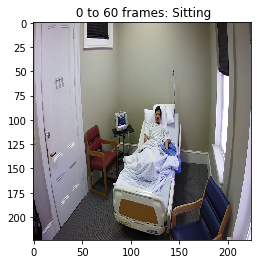

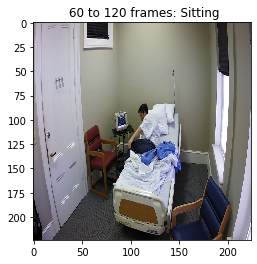

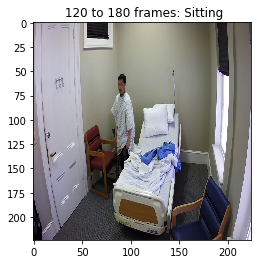

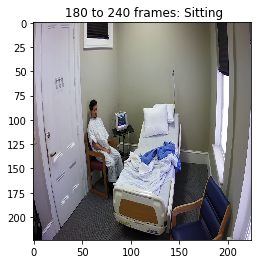

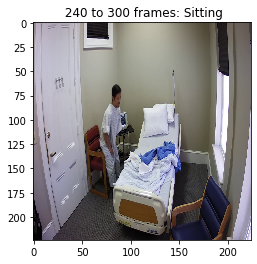

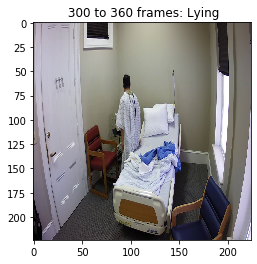

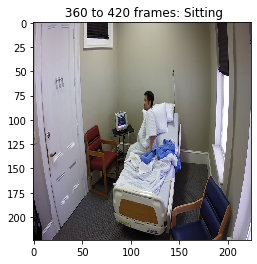

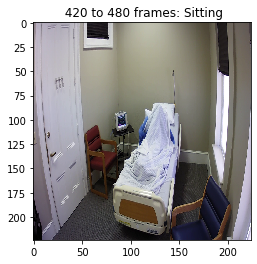

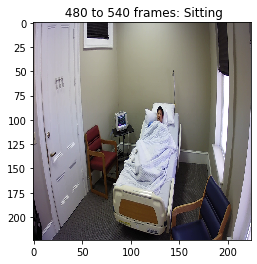

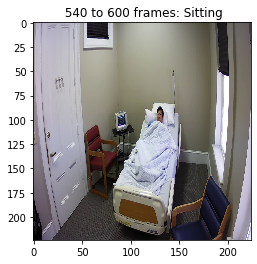

In [29]:
prediction_mapping = {0: 'Lying', 1: 'Sitting', 2: 'Standing'}
for i in range(len(result_list)):
    plt.subplots()
    plt.title(' ' + str(i*frames_to_cut) + ' to ' + str((i+1)*frames_to_cut) + ' frames: ' + prediction_mapping[result_list[i]])
    plt.imshow(im_list[i])